# ASL-Alphabet Classification

This notebook contains approaches to classify letter/alphabet images that contain gestures of the American Sign Language (ASL). Deep Learning models are used with Keras, including CNNs defined from scratch, ResNet50 with fine tuning and autoencoders in combination with logistic regression for interpretability.

The original dataset can be downloaded from Kaggle: [asl-alphabet](https://www.kaggle.com/datasets/grassknoted/asl-alphabet).

Table of Contents:

- [1. Load Dataset](#1.-Load-Dataset)
- [2. Visualize and Examine Dataset](#2.-Visualize-and-Examine-Dataset)
- [3. Pre-processing: One-Hot Encoding](#3.-Pre-processing:-One-Hot-Encoding)
- [4. Define Model 1: Simple CNN from Scratch](#4.-Define-Model-1:-Simple-CNN-from-Scratch)
- [5. Train Model 1](#5.-Train-Model-1)
- [6. Evaluate Model 1](#6.-Evaluate-Model-1)
- [7. Define, Train & Evaluate Model 2: ResNet50 with Fine-Tuning](7.-Define,-Train-&-Evaluate-Model-2:-ResNet50-with-Fine-Tuning)

## 1. Load Dataset

In [140]:
import numpy as np
np.random.seed(5)
import pandas as pd
import tensorflow as tf
import utils
import matplotlib.pyplot as plt

In [125]:
# Load pre-shuffled training and test datasets
# Both the train & test splits are taken from the same dataset
(x_train, y_train), (x_test, y_test) = utils.load_data(
    container_path = 'data/asl_alphabet_train/asl_alphabet_train')

In [110]:
x_train.shape

(60000, 50, 50, 3)

In [111]:
y_train.shape

(60000,)

In [112]:
y_train

array([16, 19, 11, ...,  4, 21, 21])

In [113]:
x_test.shape

(15000, 50, 50, 3)

In [119]:
x_train.min()

0.0

In [118]:
x_train.max()

1.0

## 2. Visualize and Examine Dataset

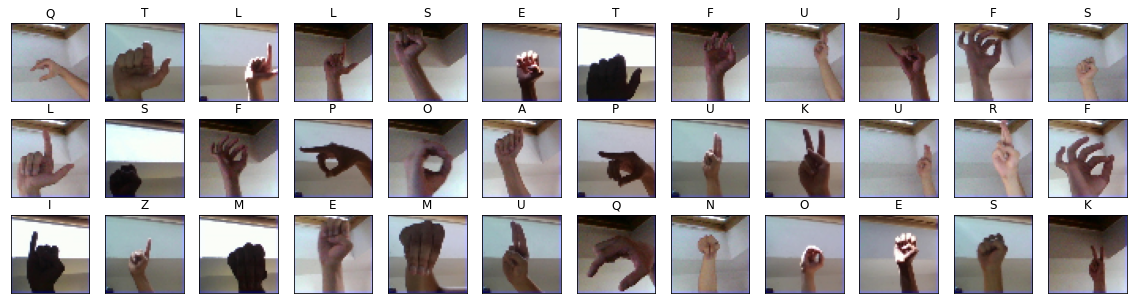

In [101]:
# Store labels of dataset
#labels = ['A', 'B', 'C']
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
          'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
          'S', 'T', 'U', 'W', 'X', 'Y', 'Z']

# Print the first several training images, along with the labels
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

In [102]:
# The dataset is quite balanced!
print("Train/test samples per class:")
for i, label in enumerate(labels):
    num_train = sum(y_train==i)
    num_test = sum(y_test==i)
    print(f"{label}: {num_train} / {num_test} = {round(num_train/num_test, 2)}")

Train/test samples per class:
A: 2384 / 616 = 3.87
B: 2392 / 608 = 3.93
C: 2454 / 546 = 4.49
D: 2395 / 605 = 3.96
E: 2379 / 621 = 3.83
F: 2386 / 614 = 3.89
G: 2408 / 592 = 4.07
H: 2416 / 584 = 4.14
I: 2354 / 646 = 3.64
J: 2387 / 613 = 3.89
K: 2412 / 588 = 4.1
L: 2382 / 618 = 3.85
M: 2399 / 601 = 3.99
N: 2360 / 640 = 3.69
O: 2397 / 603 = 3.98
P: 2391 / 609 = 3.93
Q: 2409 / 591 = 4.08
R: 2398 / 602 = 3.98
S: 2396 / 604 = 3.97
T: 2418 / 582 = 4.15
U: 2436 / 564 = 4.32
W: 2429 / 571 = 4.25
X: 2410 / 590 = 4.08
Y: 2403 / 597 = 4.03
Z: 2405 / 595 = 4.04


## 3. Pre-processing: One-Hot Encoding

In [103]:
from keras.utils import np_utils

# One-hot encode the training labels
y_train_OH = np_utils.to_categorical(y_train, len(labels))

# One-hot encode the test labels
y_test_OH = np_utils.to_categorical(y_test, len(labels))

## 4. Define Model 1: Simple CNN from Scratch

In [142]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(filters=16,
                 kernel_size=3,
                 padding='same',
                 activation='relu',
                 input_shape=(50, 50, 3)))
# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) # 50/2 = 25
# Add a convolutional layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) # 25/2 = 12
# Add a convolutional layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) # 12/2 = 6
# Add a convolutional layer
model.add(Conv2D(filters=128,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) # 6/2 = 3
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))
# Summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 128)        

## 5. Train Model 1

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
# Compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [76]:
# Early stopping when validation loss stops decreasing
# Arguments:
# - monitor: value to be monitored -> val_loss: loss of validaton data
# - mode: min -> training stops when monitored value stops decreasing
# - patience: number of epochs with no improvement after which training will be stopped
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [77]:
# Train the model
hist = model.fit(x_train,
                 y_train_OH,
                 epochs=20,
                 validation_split=0.2,
                 batch_size=32,
                 shuffle=True,
                 callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 271s 6ms/step - loss: 1.1372 - accuracy: 0.6346 - val_loss: 0.2899 - val_accuracy: 0.9026
Epoch 2/20
48000/48000 [==============================] - 267s 6ms/step - loss: 0.1625 - accuracy: 0.9442 - val_loss: 0.0643 - val_accuracy: 0.9800
Epoch 3/20
48000/48000 [==============================] - 304s 6ms/step - loss: 0.0773 - accuracy: 0.9745 - val_loss: 0.0257 - val_accuracy: 0.9918
Epoch 4/20
48000/48000 [==============================] - 1240s 26ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0143 - val_accuracy: 0.9961
Epoch 5/20
48000/48000 [==============================] - 312s 6ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0608 - val_accuracy: 0.9822
Epoch 6/20
48000/48000 [==============================] - 310s 6ms/step - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0139 - val_accuracy: 0.9952
Epoch 7/20
48000/48000 [==============================] - 31

## 6. Evaluate Model 1

<AxesSubplot:>

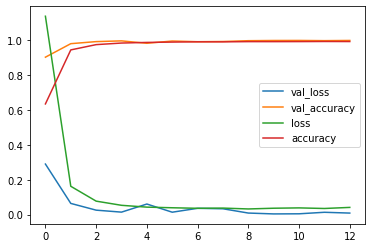

In [131]:
# Plot learning curves
losses = pd.DataFrame(model.history.history)
losses.plot()

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [79]:
# Obtain accuracy on test set
score = model.evaluate(x=x_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.998199999332428


In [80]:
# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = model.predict_classes(x_test)
#y_preds = np.argmax(yp, axis=1)

In [81]:
outcome = pd.DataFrame(np.array([y_test,y_preds]).T, columns=['true', 'pred'])
id2label = {i:value for i,value in enumerate(labels)}
outcome = outcome[['true','pred']].replace(id2label)

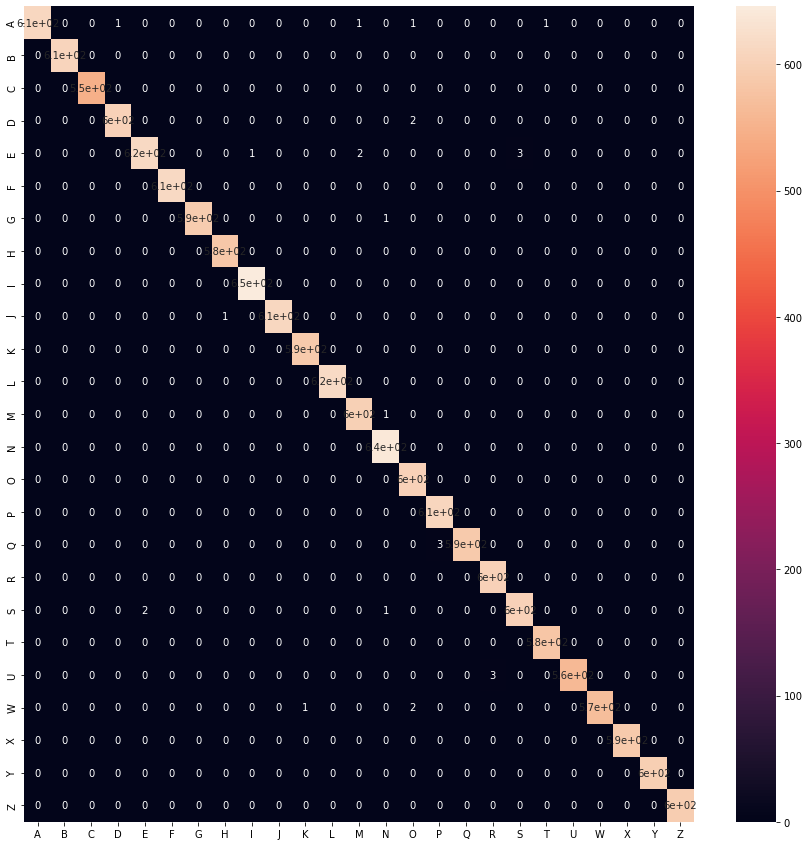

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(outcome['true'],outcome['pred']),
            xticklabels=labels,
            yticklabels=labels,
            annot=True);

In [83]:
# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.where(y_preds!=y_test)[0]

In [84]:
len(bad_test_idxs)

27

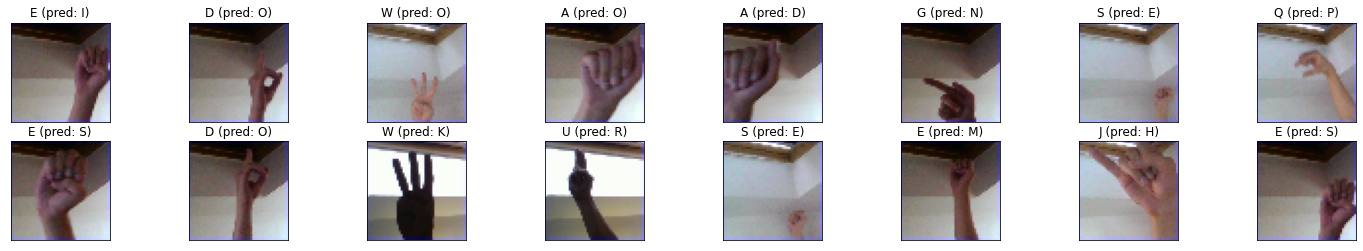

In [86]:
# Print a random subset of mislabeled examples
fig = plt.figure(figsize=(25,4))
subset_size = 16
try:
    assert subset_size < len(bad_test_idxs)
except AssertionError:
    print("Use a smaller subset size!")
# Pick a random subset
z = int(np.random.rand()*(len(bad_test_idxs)-subset_size))
subset = bad_test_idxs[z:(z+subset_size)]
for i, idx in enumerate(subset):
    ax = fig.add_subplot(2, int(np.ceil(len(subset)/2)), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    ax.set_title("{} (pred: {})".format(labels[y_test[idx]], labels[y_preds[idx]]))

## 7. Define, Train & Evaluate Model 2: ResNet50 with Fine-Tuning

In [126]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [127]:
# Apply ResNet50-specific preprocessing
def preprocess(images, labels):
    return preprocess_input(images), labels

x_train_res, y_train_OH = preprocess(x_train, y_train_OH)

In [128]:
x_train_res.min()

-123.68

In [132]:
x_train_res.max()

-102.939

In [135]:
x_train_res.shape

(60000, 50, 50, 3)

In [148]:
# Empty sequential model
resnet_model = Sequential()

# From Keras Applications, we can download many pre-trained models
# If we specify include_top=False, the original input/output layers
# are not imported.
# Note that we can specify our desired the input and output layer sizes!
pretrained_model= ResNet50(include_top=False,
                   input_shape=(x_train.shape[1:]),
                   pooling='avg',
                   classes=len(labels),
                   weights='imagenet')
# Freeze layers; if not active, fine-tuning
for layer in pretrained_model.layers:
    layer.trainable = False

# Add ResNet to empty sequential model
resnet_model.add(pretrained_model)

# Now, add the last layers of our model which map the extracted features
# too the classes - that's the classifier, what's really trained
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(len(labels), activation='softmax'))

# The complete model (fine-tuning) has 24/0.7 = 34x more parameters than the previous one!
# The transfer learning model has 1/0.7 = 1.4x more parameters than the previous one
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 25)                12825     
Total params: 24,649,625
Trainable params: 1,061,913
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# Train/Fit
# I use less epochs, since in the previous model with 10 we were already good enough
history = resnet_model.fit(
                 x_train,
                 y_train_OH,
                 epochs=10, 
                 validation_split=0.2,
                 batch_size=32,
                 shuffle=True,
                 callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1173s 24ms/sample - loss: 1.2334 - accuracy: 0.6266 - val_loss: 8.1103 - val_accuracy: 0.0392
Epoch 2/10
36736/48000 [=====================>........] - ETA: 3:41 - loss: 0.6819 - accuracy: 0.7810

In [ ]:
# Plot learning curves
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Obtain accuracy on test set
score = model.evaluate(x=x_test, 
                       y=y_test_OH,
                       verbose=0)
print('Test accuracy:', score[1])

In [ ]:
# Get predicted probabilities for test dataset
y_probs = model.predict(x_test)

# Get predicted labels for test dataset
y_preds = model.predict_classes(x_test)
#y_preds = np.argmax(yp, axis=1)

In [ ]:
outcome = pd.DataFrame(np.array([y_test,y_preds]).T, columns=['true', 'pred'])
id2label = {i:value for i,value in enumerate(labels)}
outcome = outcome[['true','pred']].replace(id2label)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(outcome['true'],outcome['pred']),
            xticklabels=labels,
            yticklabels=labels,
            annot=True);

In [ ]:
# Indices corresponding to test images which were mislabeled
bad_test_idxs = np.where(y_preds!=y_test)[0]

In [ ]:
len(bad_test_idxs)

## 8. Define, Train & Evaluate Model 3: Autoencoder + Random Forest

This model is probably a little bit peculiar. Since the neural networks seem to be working that well, I will try to use them to compress the images to a latent representation. Then, with that latent representation:

- I attach a classifier: a Random Forest.
- I plot the samples in a 2D space with manifold learning.